## Challange 3

#### Autoren: Alexander von Stegmann und Stein / Cyrill Müller

In diesem Jupyter Notebook erklären wir, wie wir beim Bearbeiten der Challange 3
"Das Auffinden von Patterns" vorgegangen sind. Wir erklären dabei, wie wir die Daten erarbeitet
haben und zeigen auf, weshalb Alexander und ich die dritte Challenge gemeinsam gelöst haben.
Wir hoffen, dass wir beide die Bonuspunkte erhalten werden - obwohl bzw. gerade deshalb, weil wir
unkonventionell vorgegangen sind.

Also, starten wir! Let's go!

In [1]:
#Bevor wir starten downloaden wir mal alle möglichen Bibliotheken, welche nützlich sein könnten. 

# pip3 install wordcloud
# pip3 install ipywidgets

### 1. Schritt: Sammeln der Twitter Daten

Wir stellen in einem ersten Schritt unsere beiden Scripts vor und erklären anschliessend,
welches wir verwendet haben. Spoiler-Alarm: Twint und Jupyter Notebook sind nicht auf Anhieb Freunde.

(Beim Ausführen der nächsten Zellen werden Fehlermeldungen auftreten, einfach überspringen,
wir erklären wieso. ☺)

Um das JSON-einfach wieder einzulesen, hat Alex noch einen kleinen Umweg genommen
und es so angepasst, dass es ohne vorheriges, manuelles Anpassen per json.loads eingelesen werden kann.

In [2]:
import twint
import json

c = twint.Config()
c.Username = "ABack"
c.Since = "2010-01-01 00:00:00"
c.Store_json = True
c.Output = "ABack_raw.json"
twint.run.Search(c)

# https://stackoverflow.com/questions/51919698/cant-parse-json-file-json-decoder-jsondecodeerror-extra-data
with open('ABack_raw.json') as f:
    data = json.loads("[" + f.read().replace("}\n{", "},\n{") + "]")

with open('ABack_tweets.json', 'w', encoding='utf-8') as f:
    json.dump(data, f)

RuntimeError: This event loop is already running

3, 2, 1... Fehlermeldung - ok, dann schauen wir doch mal, was Cyrill so gemacht hat...

Cyrill's Skript für die erste Challenge sieht nahezu identisch aus:

In [3]:
import twint

c = twint.Config()
c.Username = "ABack"
c.Since = "2010-01-01"
c.Store_json = True
c.Output = "MuellerCyrill.json"

twint.run.Search(c)

RuntimeError: This event loop is already running

Die Fehlermeldung bleibt bestehen, aber der Code sieht schon mal eleganter aus - sorry Alex, der musste sein...

###### *Arne, bist du noch eigentlich da?*

In [5]:
import ipywidgets as widgets

button = widgets.Button(description='Ja, ich bin noch da!')
out = widgets.Output()
def on_button_clicked(_):
    with out:
          print('Schön, dass du noch da bist!')
button.on_click(on_button_clicked)
widgets.VBox([button,out])


Nach kurzer Recherche haben wir herausgefunden, dass Jupyter Notebooks beim Initialisieren direkt
Event-Loops starten, die das Ausführen von Twint behindern. Aus diesem Grund muss man per
**nest_asyncio** mehrere Loops erlauben. (*https://github.com/twintproject/twint/issues/166*)

In diesem Schritt haben wir auch direkt das Exportieren eines JSON files übersprungen und stattdessen
die Daten direkt in Form eines pandas DataFrame ausgeben lassen:

In [6]:
import nest_asyncio
import twint

nest_asyncio.apply()

c = twint.Config()

c.Username = 'ABack'
c.Since = '2010-01-01 00:00:00'
c.Until = '2021-03-23 00:00:00'
c.Pandas = True

twint.run.Search(c)

1370418364129107972 2021-03-12 17:56:13 +0200 <ABack> Mein Sprachassistent Google Home versteht mich in jüngster Zeit schlechter als auch schon - können Algorithem an Zuviel (Daten) kippen? Wie Ökosysteme? So jedenfalls die Vermutung in meiner Kolumne: Das Web hat ein Messie Syndrom:  https://t.co/gOfhpDx2US (letzter Absatz).  https://t.co/toWegL3y5Z
1368645725064683520 2021-03-07 20:32:23 +0200 <ABack> Was kommt nach Notebooks, Tablets und Smartphones? Die 3-te Generation des Personal Computing - mit Mixed Reality. ETH Prof. Dr. Marc Pollefeys öffnet denen die Augen, die sich 30 Min Zeit nehmen für die techn. Details und Anwendungspotentiale:  https://t.co/M0KlPHrYBL
1367367810524061701 2021-03-04 07:54:25 +0200 <ABack> Wüstensand aus Afrika auf Schnee in den Schweizer Alpen. Die Natur ist auf Vereinigung +Überwinden von Grenzen aus. Steht der #Diavolezza Teufelin gut.  #InLovewithSwitzeland #Daycatcher  https://t.co/XfhmWmJj7c
1365336511902846977 2021-02-26 17:22:45 +0200 <ABack> Sto

1223894242034159617 2020-02-02 10:01:40 +0200 <ABack> Von alten Gewohnheiten + Werten verabschieden! Die Art der Ausbildung im allseits geschätzten dualen Berufsausbildungssystem passt nicht mehr in die – agile – Arbeitswelt, sagt Coach A. Schneider im Gespräch (8 Min) mit #LearningInsights  https://t.co/0KywnCaIaJ  https://t.co/jAxBz52KXo
1222225899589980160 2020-01-28 19:32:16 +0200 <ABack> School@learntec Forum hat sich gelohnt. @smartfeld: Wenn uns jemand mit der Digital Entrepreneurship Werkstatt buchen wollte, sagte ich: Ist alles zum Selbermachen bereit, unter CC-Lizenz #OER . Danke Arne und Nina für 3 Std. Stimme-Einsatz  https://t.co/FHcH31wtEK
1222203230882533381 2020-01-28 18:02:12 +0200 <ABack> Thanks Ajit, expert in AI/ML &amp; IoT as well as in mobile solutions in our award jury: for letting your community know about our award call  https://t.co/NjA9gFQEBi
1222197831202693130 2020-01-28 17:40:44 +0200 <ABack> Your business best practice solution - either (Smart) IoT, or m

1059871515204825089 2018-11-06 19:13:55 +0200 <ABack> So kann man den Sommer auch beschwören. Garten-Cafe des Wagner Museum in Luzern. #VERLIEBTindieSCHWEIZ  https://t.co/yb88Lt1FQX
1057683593290489858 2018-10-31 18:19:54 +0200 <ABack> Ein malender Roboter, erfahre gerade mehr dazu im öffentlichen Programm @HSGStGallen. Evt nützlich für @smartfeld  https://t.co/zBsFeGoNce
1056945080077037568 2018-10-29 17:25:18 +0200 <ABack> @sms2sms Grade morgen an der Herbsttagung  https://t.co/Lzdqd8KzZy, nur abends Zeit, besser nächste Gelegenheit, ist notiert. Wird Dez.
1056576686253371392 2018-10-28 17:01:26 +0200 <ABack> @sms2sms Das mit der fundamentalen Wechselwirkung "verstehe" ich wohl, well said. Ich muss aber auch gestehen, dass Tweets und twitter threads eine Sprache sind, die meine Verstehens- und Kommunikationsfähigkeit überfordern. So rätsle ich zwar, schweige aber  lieber.
1055769957588439041 2018-10-26 12:35:47 +0200 <ABack> Als journalistische Profi-Bloggerin hat man viel zu schlepp

925242177793425408 2017-10-31 07:05:00 +0200 <ABack> Vergisst man leicht, obwohl man es ja weiss, in der Begeisterung für die eigene/n Ideen.  https://t.co/qW3FN2hxVE
925057567029710848 2017-10-30 18:51:25 +0200 <ABack> Geht das in die Richtung wie die Suchmaschine Swisscows.ch von @Mr_Hulbee?  https://t.co/3ArpB2adxP
925051960587407362 2017-10-30 18:29:08 +0200 <ABack> Smiling has the same happiness effect as 2000 chocolate bars. I prefer to combine both!  https://t.co/xu3BPGHC3D
925044727686356992 2017-10-30 18:00:24 +0200 <ABack> Very good advice how to choose your Christmas gifts: last paragraph  https://t.co/VfY5U1BLlX
924363313609310208 2017-10-28 21:52:42 +0200 <ABack> Disruptors-Incumbents and ..?... Accountants that calculate weird things. UX explained:  https://t.co/mpm1ohbfLf by @StefanPetzov
923275863659040771 2017-10-25 21:51:34 +0200 <ABack> Taxi-Drohne, mehr davon!  https://t.co/PEkEfHW85v
922821938837381120 2017-10-24 15:47:50 +0200 <ABack> Macht richtig Freude!  https:

878559171054104576 2017-06-24 12:23:23 +0200 <ABack> #alpensalon route zum Warmlaufen steht fest. @e_trude geht voran  https://t.co/fGHkIhQEfL
877173018321182723 2017-06-20 16:35:19 +0200 <ABack> Letzte Kolumne vor der Sommerpause mit Leseempfehlungen: Tiefsinniges und Comedy:  https://t.co/HbP71TNbj6
875740080580812800 2017-06-16 17:41:20 +0200 <ABack> Tech-Glorifizierungen vor über 50 Jahren sind heute Altlasten. Wirds mit e-Mobility in 2110 genauso sein?  https://t.co/Fx9kt8BTim
873966989416574976 2017-06-11 20:15:42 +0200 <ABack> Thx @bobcaswell and Lisa Herbert @openSAP for including blockchain and drones into the new IoT course:  https://t.co/l0vbnn2Ta1
873966292377772032 2017-06-11 20:12:56 +0200 <ABack> 1st week of @openSAP IoT-course  https://t.co/l0vbnn2Ta1. "The future of IoT are drones". Like: IoT is so inclusive. Still time to join 6-15
873289360036294656 2017-06-09 23:23:03 +0200 <ABack> Swiss academic hospitality. Das team für die VHB Jahrestagung @HSGStGallen hat alles 

828716706180759552 2017-02-06 22:27:14 +0200 <ABack> ...  mit dem Titel: Digitale Transformation am Beispiel der SAP  https://t.co/V9bnWd6LCq
825555548196069376 2017-01-29 05:05:55 +0200 <ABack> Na sowas - hab Coworkingspace als Hanahouse gelesen: Hana = Hawaiian für Work. Heisst aber Hana und D:Haus, nach @sap Hana-DB  https://t.co/hR1PuoTpEx
825456714866581504 2017-01-28 22:33:11 +0200 <ABack> Coworking-Hanahouse in Palo Alto: Every section, inside and outdoors, super atmosphere for work. Great Thanks @SAP  https://t.co/T5UJWUSw27
824694016914501632 2017-01-26 20:02:30 +0200 <ABack> Being at @swissnexSF workspace  inspires, and great view  https://t.co/TVJPHOSRjg
824516166173405186 2017-01-26 08:15:47 +0200 <ABack>  https://t.co/hTc198wmWp my first use of Netflix yesterday. Nice concluding remark: Love people and use things, the opposite never works
824086859923865601 2017-01-25 03:49:52 +0200 <ABack> Selbst schon gemacht - sehr zu empfehlen. Forschung auf Weltspitzenniveau + anschau

727972175492333568 2016-05-04 23:24:26 +0200 <ABack> And the mobile business award winner is? Jury @Stanoevska @Enrico_Senger @mike4smama knows. Attend #mbforum16  https://t.co/KXVW9oNgSD
727970788247244800 2016-05-04 23:18:55 +0200 <ABack> #mbforum16 award jury at work. Thx @Stanoevska @mike4smama @Enrico_Senger @stadtnomadin  https://t.co/T2cMAM3LB9
727438888415940608 2016-05-03 12:05:20 +0200 <ABack> @TechPreacher War sehr inspirierend und fördert die Maker-Haltung - Danke sehr!
727123020586860544 2016-05-02 15:10:12 +0200 <ABack> @TechPreacher zeigt @Hsgstgallen @aback Vorlesung den azure IoT Baukasten und rp sensor  https://t.co/DBtt6P6D8D
725561260650156032 2016-04-28 07:44:19 +0200 <ABack> Attend CH Mobile Biz Forum Jun1: Top in Industry #wearables Tudela @vandrico_inc: keynotes   https://t.co/NjA9gFQEBi  https://t.co/hejC7vhFjs
725557969002336257 2016-04-28 07:31:14 +0200 <ABack> Inno Speeddating und Studie: Smart-Augmented–Connected, 1.6. St.G. nicht verpassen:  https://t.co/N

449106694866747392 2014-03-27 09:52:34 +0200 <ABack> Ob ich das heute schaffe?: "Wir sollten die Müden ermutigen, nicht die Mutigen ermüden" (Arno Backhaus, Liedermacher)
448779573120217089 2014-03-26 12:12:42 +0200 <ABack> Customer Loyalty Programm horror: Bäcker sagt: 10 Kreuze für DIESES Brot, dann 11tes gratis. So weit kommts noch    http://t.co/SDUoyraXVH
448764592781815808 2014-03-26 11:13:11 +0200 <ABack> 90 Min. online häufige Sätze in Schweizerdeutsch üben? Habe noch ein paar Gutscheincodes, bei mir melden genügt.
448545205642625026 2014-03-25 20:41:25 +0200 <ABack> @shibby schon ausgerichtet. Wo findet man dich?
447695866800115713 2014-03-23 12:26:27 +0200 <ABack> Young digital native, #SOHN, sieht meinen Yammer screen. S: Facebook für die Uni?. Ich: Ja. S: COOL!!
446639251946733570 2014-03-20 14:27:50 +0200 <ABack> IWI-HSG | IWI 3: Mobile Business Best Practice Award -   http://t.co/bcD2pgdrgd Mobile Business Best Practice bei Ihnen? @HSGStGallen ver...
446638102455787520 20

170148227012771840 2012-02-16 15:11:13 +0200 <ABack> Bloggingbooks.de - RT @anjalorenz: @ABack Wer hätte denn daran Interesse? #blogbuch; kenn ich nicht, hab noch nicht Ja gesagt :-)
170146730640277504 2012-02-16 15:05:16 +0200 <ABack> Schon lustig: Alte Welt heiratet neue: Verlag fragt an, meine Blogposts als Buch zu veröffentlichen. Glückliche Ehe?
170068511761240064 2012-02-16 09:54:27 +0200 <ABack> Link vergessen: Erfahrungsbericht Facebook in der Lehre: E-Mail mit Kursteilnehmern war gestern:  http://t.co/jlJaLWr9
170068328021360640 2012-02-16 09:53:43 +0200 <ABack> E-Mail mit Kursteilnehmern war gestern. Mein Beitrag zu #wissenswert blog carnival Thema Classroom 2.0 (geht um Erfahrung mit #facebook )
170066421676650496 2012-02-16 09:46:09 +0200 <ABack> Kolumne: Microlearning verführt und kostet Zeit:  http://t.co/hfj5Tb3q (Top How-to-vided youtub 2011)
169421073350262784 2012-02-14 15:01:46 +0200 <ABack> Für Sternengucker, denen es dabei romantisch ums Herz wird: A must see:  htt

75454348792053760 2011-05-31 08:51:33 +0200 <ABack> Selbstmanagement, wenn man zu Hause arbeitet: WEb-Worker-Erfahrungsbericht und Tipps  aus 9 Jahren Praxis von:  http://bit.ly/m0IcC3
75445635268091904 2011-05-31 08:16:55 +0200 <ABack> Super! Tool Netspeak (Mehrheitsentscheid bei Englischen Ausdrücken) Macht das bequem, was ich bisher händisch tat:  http://bit.ly/iwPQNt
75444100417069056 2011-05-31 08:10:49 +0200 <ABack> Pressemitteilungen 2.0 nennt man also "Social Media Newsroom", gute Beispiele hier:  http://bit.ly/k4mvdd, u.a. Coca-Cola
75270346898550786 2011-05-30 20:40:23 +0200 <ABack> "Ich liebe es, wenn ich kleine Bomben ins Hirn des Zuschauers pflanzen kann, die später etwas in ihm auslösen." T. Gilliam im FAZ-Gespräch
75099477362487297 2011-05-30 09:21:25 +0200 <ABack> Interessante Daten aus McKinsey Studie zur Internetökonomie (13 Länder):  http://bit.ly/jcaiXL, Deutschland (nur) Mittelfeld.
74015930111369216 2011-05-27 09:35:47 +0200 <ABack> Die Web 2.0 Werte machen Karrie

22216422511869952 2011-01-04 10:03:02 +0200 <ABack> Wollen Sie Ihren CV mal anders gestalten? Ideen fürs Aus-der-Reihe-Tanzen hier:  http://bit.ly/dlctbh
22031566641307648 2011-01-03 21:48:29 +0200 <ABack> Managers and Meetings prevent productivity, not facebook, twitter etc.: TEDTalk Why Work doesn't happen at work  http://bit.ly/dVhGKT (15min)
21584058962149377 2011-01-02 16:10:15 +0200 <ABack> Sammlung von iPad Tipps und Tricks:  http://bit.ly/9Z1WcI
21328356813316097 2011-01-01 23:14:11 +0200 <ABack> Hot Spot mal anders - Simon's Cat:  http://youtu.be/uOHvZjiDANg (mehr davon hier:  http://bit.ly/10Qgrc)
17250048718934016 2010-12-21 17:08:26 +0200 <ABack> ebook zum Recruitment 2.0 (Social Recruitment) und zur Praxis in Schweizer Unternehmen:  http://bit.ly/f9v2I7
16803809799970816 2010-12-20 11:35:15 +0200 <ABack> Kolumne: Mit E-Learning und ohne zu innerer Ruhe kommen:  http://www.learningwaves.unisg.ch/  #learningwaves
14999778395947009 2010-12-15 12:06:40 +0200 <ABack> Recruitmen

19117340729 2010-07-22 02:25:55 +0200 <ABack> RT @amcafee: From ReadWrite Enterprise: "Social enterprise and cloud computing companies are here to stay." -  http://bit.ly/aDzYLw
19091068475 2010-07-21 19:02:19 +0200 <ABack> Good example: OhMyGodWhatHappened: Future of Publishing a Booklet:  http://bit.ly/4R9rth. Pay with a tweet; Share pages where you learn s.th.
19090464062 2010-07-21 18:53:04 +0200 <ABack> This Book helps you to move into the Digital era of awesomeness. Download it for free:  http://bit.ly/4R9rth
18667696268 2010-07-16 09:22:54 +0200 <ABack> TGIF - Thank Good it is Friday neu interpretiert: Bei manch Unternehmen der bezahlte "freie" Tag für Kreatives; Lernen & Wissensweitergabe
18621534948 2010-07-15 20:16:28 +0200 <ABack> Blogwerk  http://bit.ly/93dmvG (Multitasking-Effekt) des Imgriff-Blogs bekam mein erstes Flattr-Micropayment. Hat rebell.tv das auch?
18617995721 2010-07-15 19:19:11 +0200 <ABack> Ich mach nun mit bei Social Micropayment:  http://bit.ly/aE0jbU. Ans

12093377842 2010-04-13 10:15:09 +0200 <ABack> W-LAN Zugang an der Messe Zürich, #SeLC viele Geduldsmomente weit weg - Kennwort nur auf Anfrage etc., gut hab ich UMTS Modem dabei
12052958453 2010-04-12 17:55:56 +0200 <ABack> @kununu_BRA_BOYS Ja, gute Sache. Wundere mich, dass bei den Kriterien (auch Suche)  nicht Weiterbildung zu finden ist, nur Coaching. Why?
11836347707 2010-04-08 20:12:04 +0200 <ABack> Aus stud. Arbeit über Recruiting 2.0 erfahre ich von Arbeitgeber-Bewertungsportalen, z.B. Kununu. Vergleich hier:  http://bit.ly/bx4Qzs
11825954577 2010-04-08 16:25:14 +0200 <ABack> Stimmt meine innere Uhr? Boot heute eingewassert, aber die Parkuhren am Hafen sind noch gar nicht in Betrieb - auch i.O. so ...
11783771142 2010-04-07 22:01:36 +0200 <ABack> Meine Studierenden in Teamarbeit 2.0 sind auf Tool-Entdeckung. PC-Fernsteuerung + mehr mit TeamViewer findet Gefallen:  http://bit.ly/5SXCPn
11665479270 2010-04-06 00:58:38 +0200 <ABack> Es war einmal - in Youtube ... fast alle Musikvid

8250208184 2010-01-26 21:58:27 +0200 <ABack> RT @dhinchcliffe: The Elevator Pitch for Enterprise 2.0:  http://bit.ly/8hh6rE
8234222104 2010-01-26 14:05:17 +0200 <ABack> Falls Vorgabe max. 40 Seiten: Meine  Leseauswahl zum Buch "Praxisleitfaden Enterprise 2.0" (F. Schönefeld):  http://bit.ly/7OvH76
8227064080 2010-01-26 08:26:11 +0200 <ABack> Erfindergeist kennt kein Tabu: Die Schwäbische Herstellung von Spätzle ist neu auch  mit Shaker "politically correct":  http://bit.ly/6TtdBZ
8201803029 2010-01-25 19:31:38 +0200 <ABack> Enterprise 2.0 methodologies: Dion Hinchcliffe stellt verschiedene Ansätze zusammen (vgl. letzte Folien):  http://bit.ly/3vMQQP
8199864784 2010-01-25 18:34:01 +0200 <ABack> @ToWal Gute Unterlagen als Basis für die Seminararbeit zu Cloudcomputing in der Lehrveranstaltung Mobile Business IS:  http://bit.ly/6Y8Xcu
8194365297 2010-01-25 15:57:17 +0200 <ABack> @jstuker Ag gut! Und ich trage die Kalender-Spruchkärtchen sogar im Portemonnaie mit mir herum, manchmal tagelan

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [7]:
import pandas as pd

df = twint.storage.panda.Tweets_df
df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1370418364129107972,1370418364129107972,1.615568e+12,2021-03-12 17:56:13,+0200,,Mein Sprachassistent Google Home versteht mich...,de,[],[],...,,,,,,[],,,,
1,1368645725064683520,1368645725064683520,1.615146e+12,2021-03-07 20:32:23,+0200,,"Was kommt nach Notebooks, Tablets und Smartpho...",de,[],[],...,,,,,,[],,,,
2,1367367810524061701,1367367810524061701,1.614841e+12,2021-03-04 07:54:25,+0200,,Wüstensand aus Afrika auf Schnee in den Schwei...,de,"[diavolezza, inlovewithswitzeland, daycatcher]",[],...,,,,,,[],,,,
3,1365336511902846977,1365336511902846977,1.614357e+12,2021-02-26 17:22:45,+0200,,Stolz auf Ihre Mobile Solution oder IoT-Soluti...,de,[],[],...,,,,,,[],,,,
4,1365335521942269960,1365335521942269960,1.614356e+12,2021-02-26 17:18:49,+0200,,"Stimme zu! Dass jede/r Content beitragen kann,...",de,[],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,7376661285,7376661285,1.262634e+12,2010-01-04 20:40:46,+0200,,Ein Glück gibt es Hausarbeit. So kann ich währ...,de,[],[],...,,,,,,[],,,,
1346,7368305374,7368305374,1.262615e+12,2010-01-04 15:29:33,+0200,,"FAZ 31.12.09 schreibt ""Ein gutes Argument für ...",de,[],[],...,,,,,,[],,,,
1347,7362476615,7362476615,1.262598e+12,2010-01-04 10:45:46,+0200,,"Wen interessiert, welche Tools richtungsweisen...",de,[],[],...,,,,,,[],,,,
1348,7277056996,7277056996,1.262375e+12,2010-01-01 20:46:37,+0200,,Kochpraktikum für drei Boys an Herd und Ofen -...,de,[],[],...,,,,,,[],,,,


### 2. Schritt: Das Scrappen von IWI-Blog

Nun müssen wir noch den Blog vom IWI scrappen. Um ehrlich zu sein, haben wir am letzten Wochenende diesen
Blog verflucht, aber so richtig. Aber der Reihe nach, wir stellen wieder beide Codes vor.

Schauen wir uns dieses mal zuerst den Code von Cyrill an.
(Cyrill ist bis heute nicht stolz darauf, dass er das Resultat nur mit einem so hässlichen Code hingekriegt hat -.-)

Die einzelnen Pages hat er durch den Chrome Scraper (csv und formel verketten) gewonnen,
da seine while Schlaufe immer einen Bug hatte...

Aussage Cyrill: Ich glaub die Codezeilen überspringen wir gerade und vergessen das Thema...

*(Hint, du musst die Scraper wirklich nicht ausführen, wir importieren die Daten später direkt)*

In [8]:
import scrapy

class GetdataSpider(scrapy.Spider):
    name = 'getdata'
    allowed_domains = ['aback-blog.iwi.unisg.ch']
    start_urls = ['https://aback-blog.iwi.unisg.ch/2017/02/14/mobile-apps-im-gesundheitsbereich/',
'https://aback-blog.iwi.unisg.ch/2020/05/17/teil-5-5-lernkultur-raum-fuer-neue-lernkultur-an-der-uni-st-gallen-warum-positive-fehlerkultur-ein-ungluecklicher-begriff-ist/',
'https://aback-blog.iwi.unisg.ch/2017/09/14/khan-lab-school-im-silicon-valley-wird-schule-neu-erfunden-interview-teil-1-von-4/',
'https://aback-blog.iwi.unisg.ch/2018/10/17/entdecke-das-potenzial-des-internet-of-things/',
'https://aback-blog.iwi.unisg.ch/2017/10/16/wer-die-leitungsfunktion-fuer-digitale-transformation-inne-hat/',
'https://aback-blog.iwi.unisg.ch/2020/11/12/learning-analytics-das-lernen-der-zukunft-basiert-auf-smart-data/',
'https://aback-blog.iwi.unisg.ch/2017/12/19/jim-studie-2017-zum-medienumgang-von-jugendlichen/',
'https://aback-blog.iwi.unisg.ch/2018/10/12/triple-overload-immer-hochgradig-beschaeftigt/',
'https://aback-blog.iwi.unisg.ch/2020/04/20/die-jurierung-der-eingereichten-loesungen-fuer-den-forum-day-2020-ist-abgeschlossen/',
'https://aback-blog.iwi.unisg.ch/2020/10/14/call-for-papers-wum-heft-themenschwerpunkt-digitale-plattformen-und-oekosysteme/',
'https://aback-blog.iwi.unisg.ch/2019/12/05/berufliche-bildung-im-digitalen-zeitalter-das-expertenportal-learning-insights-startet-durch/',
'https://aback-blog.iwi.unisg.ch/2020/06/16/call-for-papers-wum-heft-5-themenschwerpunkt-it-und-sport/',
'https://aback-blog.iwi.unisg.ch/2020/11/12/360-grad-bilder-und-vr-brillen-erklaert-von-der-maus/',
'https://aback-blog.iwi.unisg.ch/2020/10/14/4-tipps-fuer-die-einbindung-von-videos-in-die-lehre-eine-studie-mit-ergebnissen-von-vor-covid19/',
'https://aback-blog.iwi.unisg.ch/2017/09/14/unsere-mobile-business-studie-2017-mit-agiler-innovation-zu-next-generation-mobile-business/',
'https://aback-blog.iwi.unisg.ch/2018/03/12/buch-lean-startup-zuhoeren-und-dienen-als-geschaeftsprinzip/',
'https://aback-blog.iwi.unisg.ch/2018/10/12/kolumne-unsere-abwesenheitsmeldungen-im-email-sagen-mehr-als-out-of-office/',
'https://aback-blog.iwi.unisg.ch/2020/09/17/storytelling-im-elearning-kontext-tipps-fuer-die-praxis/',
'https://aback-blog.iwi.unisg.ch/2017/06/12/app-programmierung-einfach-gemacht/',
'https://aback-blog.iwi.unisg.ch/2020/05/17/digitalisierung-im-stadion-die-entwicklung-einer-mobilen-spieltags-app/',
'https://aback-blog.iwi.unisg.ch/2020/03/17/angstbefreites-scheitern-ein-interview-mit-prof-dr-andrea-back-in-der-hz/',
'https://aback-blog.iwi.unisg.ch/2019/10/13/save-the-date-am-14-mai-2020-findet-der-naechste-smart-iot-mobile-business-forum-day-statt/',
'https://aback-blog.iwi.unisg.ch/2020/06/16/high-resolution-prototyp-fuer-das-gesundheitswesen/',
'https://aback-blog.iwi.unisg.ch/2017/03/13/verhaeltnis-digitalisierung-in-deutschland-vs-usa-wo-sind-die-unterschiede/',
'https://aback-blog.iwi.unisg.ch/2019/10/13/wer-ist-eigentlich-der-wettkoenig-zu-3d-welten/',
'https://aback-blog.iwi.unisg.ch/2019/04/07/smart-iot-mobile-business-awards-2019/',
'https://aback-blog.iwi.unisg.ch/2017/04/11/digital-maturity-transformation-report-2017/',
'https://aback-blog.iwi.unisg.ch/2020/02/17/die-digital-entrepreneurship-werkstatt-auf-der-learntec2020/',
'https://aback-blog.iwi.unisg.ch/2019/12/13/das-buero-der-zukunft-eine-visualisierung/',
'https://aback-blog.iwi.unisg.ch/2019/04/08/living-packets-wie-ein-start-up-den-paketversand-revolutionieren-will/',
'https://aback-blog.iwi.unisg.ch/2017/10/17/bildungseinrichtungen-digital-transformiert/',
'https://aback-blog.iwi.unisg.ch/2019/12/13/das-buero-der-zukunft-eine-visualisierung/',
'https://aback-blog.iwi.unisg.ch/2020/05/17/bekanntgabe-der-nominierten-loesungen-des-forum-day-2020/',
'https://aback-blog.iwi.unisg.ch/2017/06/08/vortrag-ueber-reiseerfahrungen-im-silicon-valley/',
'https://aback-blog.iwi.unisg.ch/2019/03/12/die-erstbesteigung-des-matterhorns-im-startup-jargon/',
'https://aback-blog.iwi.unisg.ch/2019/05/16/kreativitaet-ist-unbequem-und-voll-schamesroete/',
'https://aback-blog.iwi.unisg.ch/2018/09/12/data-literacy-kompetenzen-vermitteln/',
'https://aback-blog.iwi.unisg.ch/2017/11/21/digitale-transformation-in-der-praxis-kundenorientierung-innovation-und-mut/',
'https://aback-blog.iwi.unisg.ch/2017/10/17/6-st-gallen-mobile-business-forum-am-7-nov-in-zuerich/',
'https://aback-blog.iwi.unisg.ch/2020/09/17/zpe-2020-digitaler-thementag-learning-training-am-14-oktober/',
'https://aback-blog.iwi.unisg.ch/2017/04/17/beitrag-marketplace-an-der-selc-mini-design-thinking-sprint-zur-zukunft-der-lehre/',
'https://aback-blog.iwi.unisg.ch/2014/02/11/kolumne-digitales-spiegelkabinett/',
'https://aback-blog.iwi.unisg.ch/2017/12/19/buch-homo-deus-in-was-fuer-einer-zukunft-wollen-wir-leben/',
'https://aback-blog.iwi.unisg.ch/2018/12/17/silicon-valley-satire-mehr-als-eine-kurzgeschichte/',
'https://aback-blog.iwi.unisg.ch/2020/03/17/welche-trends-werden-in-drei-jahren-das-digitale-lernen-und-die-weiterbildung-bestimmen/',
'https://aback-blog.iwi.unisg.ch/2019/10/06/eddy-ein-ki-reiseassistent-per-chat-und-sprachnachricht/',
'https://aback-blog.iwi.unisg.ch/2017/04/17/augmented-worker-reparatur-einer-waermepumpe-mit-der-hololens/',
'https://aback-blog.iwi.unisg.ch/2017/10/17/artificial-intelligence-studierende-wollen-anwendungen-hands-on-verstehen/',
'https://aback-blog.iwi.unisg.ch/2014/03/17/kolumne-sehnsucht-nach-ertraeglicher-langsamkeit-des-seins/',
'https://aback-blog.iwi.unisg.ch/2020/05/17/swissteach-ag-gemeinsam-mit-culture-contact-auf-dem-vormarsch-in-sachen-kulturelle-kompetenz/',
'https://aback-blog.iwi.unisg.ch/2020/03/17/welche-trends-werden-in-drei-jahren-das-digitale-lernen-und-die-weiterbildung-bestimmen/',
'https://aback-blog.iwi.unisg.ch/2020/05/17/swissteach-ag-gemeinsam-mit-culture-contact-auf-dem-vormarsch-in-sachen-kulturelle-kompetenz/',
'https://aback-blog.iwi.unisg.ch/2019/03/13/die-kunst-des-unlearnings-der-moment-in-dem-es-klick-macht/',
'https://aback-blog.iwi.unisg.ch/2017/09/13/follow-up-zum-newsletter-artikel-zu-code-plattformen-was-ueber-den-sommer-geschah/',
'https://aback-blog.iwi.unisg.ch/2020/10/14/digital-storytelling-moeglicher-einsatz-im-bildungskontext/',
'https://aback-blog.iwi.unisg.ch/2017/03/14/fokusthema-chatbots-beispiel-versicherungsbranche-dein-neuer-kleiner-helfer-oder-automatisierung-fuer-services/',
'https://aback-blog.iwi.unisg.ch/2017/04/17/digital-twin-was-bringt-eine-virtuelle-vorlage-am-beispiel-predictive-maintainance/',
'https://aback-blog.iwi.unisg.ch/2017/03/14/fokusthema-chatbots-beispiel-fluechtlingshilfe-ein-anwalt-fuer-fluechtige/',
'https://aback-blog.iwi.unisg.ch/2018/04/12/studie-informationskompetenz-bei-studierenden-der-wirtschaftswissenschaften/',
'https://aback-blog.iwi.unisg.ch/2020/03/17/welche-trends-werden-in-drei-jahren-das-digitale-lernen-und-die-weiterbildung-bestimmen/',
'https://aback-blog.iwi.unisg.ch/2020/03/17/welche-trends-werden-in-drei-jahren-das-digitale-lernen-und-die-weiterbildung-bestimmen/',
'https://aback-blog.iwi.unisg.ch/2019/09/19/digital-ausmisten-im-stil-von-marie-kondo/',
'https://aback-blog.iwi.unisg.ch/2020/06/15/studie-zu-e-learning-trends-wie-klappt-das-e-learning-bei-ihnen-im-unternehmen/',
'https://aback-blog.iwi.unisg.ch/2017/09/13/was-lesen-digital-manager-fachzeitschriften-vs-soziale-medien/',
'https://aback-blog.iwi.unisg.ch/2020/05/17/swissteach-ag-gemeinsam-mit-culture-contact-auf-dem-vormarsch-in-sachen-kulturelle-kompetenz/',
'https://aback-blog.iwi.unisg.ch/2019/04/07/mindful-working-achtsamkeit-beim-arbeiten/',
'https://aback-blog.iwi.unisg.ch/2018/06/13/das-design-thinking-playbook/',
'https://aback-blog.iwi.unisg.ch/2019/10/06/wie-fuehlt-es-sich-an-von-robotern-bekocht-zu-werden/',
'https://aback-blog.iwi.unisg.ch/2020/04/20/teil-4-5-lernkultur-raum-fuer-neue-lernkultur-an-der-uni-st-gallen-was-bedeutet-agil-wirklich/',
'https://aback-blog.iwi.unisg.ch/2020/05/17/swissteach-ag-gemeinsam-mit-culture-contact-auf-dem-vormarsch-in-sachen-kulturelle-kompetenz/',
'https://aback-blog.iwi.unisg.ch/2017/10/17/15-einreichungen-zum-iwi-hsg-mobile-business-best-practice-award-rekord/',
'https://aback-blog.iwi.unisg.ch/2020/10/14/erfolgsfaktoren-fuer-digitale-solutions-wie-steht-es-um-die-innovationskultur-in-ihrem-unternehmen/',
'https://aback-blog.iwi.unisg.ch/2020/05/17/swissteach-ag-gemeinsam-mit-culture-contact-auf-dem-vormarsch-in-sachen-kulturelle-kompetenz/',
'https://aback-blog.iwi.unisg.ch/2020/03/17/welche-trends-werden-in-drei-jahren-das-digitale-lernen-und-die-weiterbildung-bestimmen/',
'https://aback-blog.iwi.unisg.ch/2020/03/17/forum-day-und-jurytag-sind-auf-unbestimmte-zeit-verschoben/',
'https://aback-blog.iwi.unisg.ch/2017/06/12/arbeitsform-freelancer-unter-die-lupe-genommen/',
'https://aback-blog.iwi.unisg.ch/2014/05/15/kolumne-humanoide-roboter-machen-uns-zu-robotoiden-menschen/',
'https://aback-blog.iwi.unisg.ch/2020/04/20/unsere-empfehlung-online-brainstorming-tool-miro/',
'https://aback-blog.iwi.unisg.ch/2017/06/12/symbiose-aus-stationaerem-und-online-handel-mit-startup-nearst/',
'https://aback-blog.iwi.unisg.ch/2018/11/15/spielerisch-lernen-mit-quizzen-von-kahoot/',
'https://aback-blog.iwi.unisg.ch/2017/02/14/digitalisierung-in-der-schule-woran-hapert-es/',
'https://aback-blog.iwi.unisg.ch/2018/03/13/das-virtuelle-buero-arbeiten-wir-bald-alle-in-der-virtuellen-welt/',
'https://aback-blog.iwi.unisg.ch/2020/06/16/die-sprache-der-videokonferenzen-die-wichtigsten-handzeichen/',
'https://aback-blog.iwi.unisg.ch/2020/09/17/zpe-2020-digitaler-thementag-learning-training-am-14-oktober/',
'https://aback-blog.iwi.unisg.ch/2020/06/16/trendradar-von-fortiss-zu-aktuellen-softwarethemen/',
'https://aback-blog.iwi.unisg.ch/2020/11/12/learning-analytics-das-lernen-der-zukunft-basiert-auf-smart-data/',
'https://aback-blog.iwi.unisg.ch/2020/04/20/zukunftsforscher-janszky-ueber-unser-leben-und-arbeiten-im-jahr-2030/',
'https://aback-blog.iwi.unisg.ch/2017/10/16/wenn-website-redesign-ansteht-dann-geht-seo-jeden-an/',
'https://aback-blog.iwi.unisg.ch/2018/09/12/kolumne-meine-aufmerksamkeit-gehoert-mir/',
'https://aback-blog.iwi.unisg.ch/2017/02/13/drohnen-im-zirkus-cirque-du-soleil-wie-veraendert-die-technologie-die-zirkusauffuehrung/',
'https://aback-blog.iwi.unisg.ch/2017/04/17/blockchain-mehr-als-nur-bitcoins/',
'https://aback-blog.iwi.unisg.ch/2019/11/14/innovation-durch-den-einsatz-von-enterprise-iot-loesungen-ein-modell-zur-bestimmung-des-innovationspotenzials/',
'https://aback-blog.iwi.unisg.ch/2019/12/13/aufruf-zu-einreichungen-bis-3-3-2020-fuer-die-smart-iot-und-mobile-business-best-practice-awards/',
'https://aback-blog.iwi.unisg.ch/2017/05/12/9-plattformen-zum-programmieren-lernen/',
'https://aback-blog.iwi.unisg.ch/2020/06/16/forum-day-2020-updates/',
'https://aback-blog.iwi.unisg.ch/2017/11/20/interesse-an-digital-transformation-maturity-assessment-und-studie-hoch/',
'https://aback-blog.iwi.unisg.ch/2018/06/13/open-desk-modeerscheinung-oder-produktivitaetsmaschine/',
'https://aback-blog.iwi.unisg.ch/2018/03/13/mmb-learning-delphi-erklaerfilme-als-umsatzbringer-der-stunde/',
'https://aback-blog.iwi.unisg.ch/2018/09/12/drei-app-stores-fuer-progressive-webapps/',
'https://aback-blog.iwi.unisg.ch/2018/09/12/interview-mit-barbara-josef/',
'https://aback-blog.iwi.unisg.ch/2017/06/11/internettrends-2017-von-mary-meeker/',
'https://aback-blog.iwi.unisg.ch/2018/12/17/kolumne-zuhause-huetteln-ausser-haus-loungen/',
'https://aback-blog.iwi.unisg.ch/2019/03/13/die-kunst-des-unlearnings-der-moment-in-dem-es-klick-macht/',
'https://aback-blog.iwi.unisg.ch/2014/04/15/kolumne-was-auf-der-liste-der-ungeloesten-probleme-fehlt/',
'https://aback-blog.iwi.unisg.ch/2020/06/16/die-sprache-der-videokonferenzen-die-wichtigsten-handzeichen/',
'https://aback-blog.iwi.unisg.ch/2020/06/15/zwanzig-aspekte-von-innovationskultur-um-digitale-loesungen-zu-entwickeln-wie-steht-es-bei-ihnen/',
'https://aback-blog.iwi.unisg.ch/2020/09/17/zpe-2020-digitaler-thementag-learning-training-am-14-oktober/',
'https://aback-blog.iwi.unisg.ch/2017/09/14/die-numerokratie-greift-um-sich-wirken-rankings-likes-und-sternchen-wie-selbstverordnete-freiheitsberaubung/',
'https://aback-blog.iwi.unisg.ch/2014/06/16/kolumne-tv-soaps-kill-the-case-teaching-stars/',
'https://aback-blog.iwi.unisg.ch/2020/03/15/teil-3-5-lernkultur-raum-fuer-neue-lernkultur-an-der-uni-st-gallen-die-4-ps-fokus-play/',
'https://aback-blog.iwi.unisg.ch/2020/03/17/welche-trends-werden-in-drei-jahren-das-digitale-lernen-und-die-weiterbildung-bestimmen/',
'https://aback-blog.iwi.unisg.ch/2017/02/14/maschinelles-lernen-bei-den-zooglern-im-neuen-office/',
'https://aback-blog.iwi.unisg.ch/2020/10/14/kleines-glossar-fuers-e-learning/',
'https://aback-blog.iwi.unisg.ch/2019/06/18/kolumne-innovationskultur-ist-heutzutage-in-stein-gemeisselt/',
'https://aback-blog.iwi.unisg.ch/2014/06/16/kolumne-tv-soaps-kill-the-case-teaching-stars/',
'https://aback-blog.iwi.unisg.ch/2019/12/13/aufruf-zu-einreichungen-bis-3-3-2020-fuer-die-smart-iot-und-mobile-business-best-practice-awards/',
'https://aback-blog.iwi.unisg.ch/2020/04/20/research-salon-online-via-zoom/',
'https://aback-blog.iwi.unisg.ch/2019/10/06/wie-fuehlt-es-sich-an-von-robotern-bekocht-zu-werden/',
'https://aback-blog.iwi.unisg.ch/2018/04/10/substitut-oder-komplement-wenn-roboter-unsere-arbeitsplaetze-uebernehmen/',
'https://aback-blog.iwi.unisg.ch/2020/09/17/zpe-2020-digitaler-thementag-learning-training-am-14-oktober/',
'https://aback-blog.iwi.unisg.ch/2019/12/13/aufruf-zu-einreichungen-bis-3-3-2020-fuer-die-smart-iot-und-mobile-business-best-practice-awards/',
'https://aback-blog.iwi.unisg.ch/2017/12/15/roboter-pepper-als-unterrichtsassistent/',
'https://aback-blog.iwi.unisg.ch/2020/10/14/e-learning-so-gefragt-wie-noch-nie/',
'https://aback-blog.iwi.unisg.ch/2019/10/13/frank-thelen-und-die-digitalisierung-der-schule-einfach-mal-machen/',
'https://aback-blog.iwi.unisg.ch/2020/11/12/konfrontiert-mit-einer-flut-von-kooperationsanfragen-so-meistern-sportorganisationen-die-systematische-analyse-und-bearbeitung/',
'https://aback-blog.iwi.unisg.ch/2018/06/12/beyond-the-end-of-work-es-ist-rational-optimistisch-in-die-zukunft-zu-blicken/',
'https://aback-blog.iwi.unisg.ch/2019/12/13/aufruf-zu-einreichungen-bis-3-3-2020-fuer-die-smart-iot-und-mobile-business-best-practice-awards/',
'https://aback-blog.iwi.unisg.ch/2019/02/13/infantilisierung-von-management-literatur-oder-progressives-design/',
'https://aback-blog.iwi.unisg.ch/2020/03/17/die-gewinner-des-coronavirus-teamview-zoom-und-co/',
'https://aback-blog.iwi.unisg.ch/2018/05/15/insights-vom-st-gallen-symposium-beyond-the-end-of-work/',
'https://aback-blog.iwi.unisg.ch/2018/09/12/digital-natives-eine-legende/',
'https://aback-blog.iwi.unisg.ch/2017/12/19/wozu-noch-arbeiten-vor-uns-liegt-eine-kostenlos-zukunft/',
'https://aback-blog.iwi.unisg.ch/2018/11/13/meet-up-spirit-fuer-effektive-meetings/',
'https://aback-blog.iwi.unisg.ch/2017/03/13/wie-kann-die-abbrecherquote-von-moocs-reduziert-werden/',
'https://aback-blog.iwi.unisg.ch/2020/06/16/fortschrittsverfolgung-der-digitalen-transformation-im-unternehmen-ausgehend-von-digitale-reife-assessments/',
'https://aback-blog.iwi.unisg.ch/2017/02/14/erfahrungsbericht-social-media-an-der-wi2017-an-der-universitaet-st-gallen-hsg/',
'https://aback-blog.iwi.unisg.ch/2020/02/17/noch-bis-zum-3-maerz-ihre-loesung-einreichen-und-den-smart-iot-oder-mobile-business-award-2020-gewinnen/',
'https://aback-blog.iwi.unisg.ch/2017/03/14/auf-der-suche-einer-neuen-location-fuer-das-6-mobile-business-forum-coworking-tour-in-zuerich/',
'https://aback-blog.iwi.unisg.ch/2020/02/17/cellulo-mit-einem-roboter-schreiben-lernen/',
'https://aback-blog.iwi.unisg.ch/2017/02/10/unsere-linktips-im-februar/',
'https://aback-blog.iwi.unisg.ch/2019/09/08/mit-dem-selfie-zur-mobilen-bewerbung/',
'https://aback-blog.iwi.unisg.ch/2020/11/12/learning-analytics-das-lernen-der-zukunft-basiert-auf-smart-data/',
'https://aback-blog.iwi.unisg.ch/2020/03/17/forum-day-und-jurytag-sind-auf-unbestimmte-zeit-verschoben/',
'https://aback-blog.iwi.unisg.ch/2017/03/14/der-tisch-als-zentrum-in-der-zukunftswohnung/',
'https://aback-blog.iwi.unisg.ch/2018/12/19/elitebeds-die-vernetzte-matratze/',
'https://aback-blog.iwi.unisg.ch/2018/11/09/kolumne-wenn-entscheidungsschwaeche-zum-produkt-feature-wird/',
'https://aback-blog.iwi.unisg.ch/2017/05/12/kennen-sie-noch-den-indicaball-jetzt-als-kamera/',
'https://aback-blog.iwi.unisg.ch/2020/05/17/swissteach-ag-gemeinsam-mit-culture-contact-auf-dem-vormarsch-in-sachen-kulturelle-kompetenz/',
'https://aback-blog.iwi.unisg.ch/2020/03/17/kostenloses-e-learning-zu-praeventionsmassnahmen-des-coronavirus/',
'https://aback-blog.iwi.unisg.ch/2018/05/12/monitor-digitale-bildung-die-weiterbildung-im-digitalen-zeitalter/',
'https://aback-blog.iwi.unisg.ch/2020/06/16/die-sprache-der-videokonferenzen-die-wichtigsten-handzeichen/',
'https://aback-blog.iwi.unisg.ch/2020/09/17/regierung-bewilligt-itbo-projektauftrag-zur-digital-entrepreneurship-werkstatt/',
'https://aback-blog.iwi.unisg.ch/2019/11/14/jami-sicher-chatten-durch-blockchain/',
'https://aback-blog.iwi.unisg.ch/2017/05/15/ueberraschungen-beim-digitalen-reifegrad-vortrag-von-andrea-back/',
'https://aback-blog.iwi.unisg.ch/2020/02/17/big-data-in-der-lehre-begreifbar-machen/',
'https://aback-blog.iwi.unisg.ch/2019/06/18/forum-day-rueckblick-auf-den-smart-iot-mobile-business-award/',
'https://aback-blog.iwi.unisg.ch/2019/12/13/schulkinder-vertrauen-alexa-nicht/',
'https://aback-blog.iwi.unisg.ch/2020/05/17/swissteach-ag-gemeinsam-mit-culture-contact-auf-dem-vormarsch-in-sachen-kulturelle-kompetenz/',
'https://aback-blog.iwi.unisg.ch/2017/02/10/einzug-ins-neue-gebaeude/',
'https://aback-blog.iwi.unisg.ch/2020/03/17/forum-day-und-jurytag-sind-auf-unbestimmte-zeit-verschoben/',
'https://aback-blog.iwi.unisg.ch/2017/04/13/digitalisierung-von-schulen-mit-der-schul-cloud/',
'https://aback-blog.iwi.unisg.ch/2017/09/13/webbrowser-was-gibt-es-neben-google-chrome-und-safari-sonst-noch/',
'https://aback-blog.iwi.unisg.ch/2014/06/16/kolumne-tv-soaps-kill-the-case-teaching-stars/',
'https://aback-blog.iwi.unisg.ch/2020/02/17/mehr-digitale-privatsphaere-durch-besondere-kleidung/',
'https://aback-blog.iwi.unisg.ch/2019/12/02/diy-education-was-bedeutet-dieser-trend-fuer-unternehmen-universitaeten/',
'https://aback-blog.iwi.unisg.ch/2018/06/12/kolumne-no-bla-just-do-in-leonardo-da-vincis-malatelier/',
'https://aback-blog.iwi.unisg.ch/2020/05/17/sound-of-colleagues-geraeusche-aus-dem-buero/',
'https://aback-blog.iwi.unisg.ch/2018/05/15/design-fiction-ein-neuer-blickwinkel-auf-die-arbeits-welt-der-zukunft/',
'https://aback-blog.iwi.unisg.ch/2017/04/13/digital-transformation-awards-2017-verliehen/',
'https://aback-blog.iwi.unisg.ch/2017/05/15/republica-die-besten-vortraege-rund-um-e-learning-kollaboration/',
'https://aback-blog.iwi.unisg.ch/2020/11/12/management-weiterbildung-megatrends-sprechen-fuer-aufwind/'
    ]

    def parse(self, response):

        single_blogbeitrag = response.xpath('//*[@class="col-md-6 blog-mobile"]')

        for blog in single_blogbeitrag: 
            Artikel_Autor = blog.xpath('//*[@rel="author"]/text()').extract()
            Artikel_Titel = blog.xpath('//*[@style="color: #008840;"]/text()').extract()
            Artikel_Tags = blog.xpath('//a[starts-with(@href, "https://aback-blog.iwi.unisg.ch/category/")]/text()').extract()
            Artikel_Text = blog.xpath('//div[@class="col-md-6 blog-mobile"]/p/text()|//div[@class="col-md-6 blog-mobile"]//a/text()').extract()

            yield {'Autor': Artikel_Autor,
            'Titel': Artikel_Titel,
            'Tags': Artikel_Tags,
            'Text': Artikel_Text}

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cryptography/hazmat/bindings/openssl/binding.py:102: RuntimeWarning: coroutine 'Twint.main' was never awaited
  setattr(conditional_lib, attr, getattr(lib, attr))


Schauen wir nun Alexanders Code an. What a beauty!

In [ ]:
# Benötigte Libraries

from bs4 import BeautifulSoup
import requests
import time
import csv
import re

In [ ]:
# Vorab Funktionen definieren

def create_file(file_name):
    """
    Checks if a file with the provided filename already exists. If not it creates it.
    :param file_name: str
    :return: None
    """
    try:
        f = open(file_name)
        f.close()
    except IOError:
        csv_columns = ['date', 'author', 'title', 'tags', 'link', 'text']
        with open(file_name, 'w', encoding='UTF-8', newline='') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns, delimiter='|')
            writer.writeheader()
            csvfile.close()


def save_article(article, csv_file):
    """
    Takes a DataFrame with the articles information and appends it to the prev. created csv file
    :param article: DataFrame
    :param csv_file: str
    :return: None
    """
    csv_columns = ['date', 'author', 'title', 'tags', 'link', 'text']
    with open(csv_file, 'a', encoding='UTF-8', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns, delimiter='|')
        # writer.writeheader()
        writer.writerow(article)
        csvfile.close()


def get_articles(page_url, csv_file):
    """
    Calls get_links and iterates through list of url and extracts article metadata and full text.
    :param page_url: list of urls
    :param csv_file: str
    """
    data = requests.get(page_url)  # url of article page
    soup = BeautifulSoup(data.content, 'html.parser')
    articles = soup.findAll('div', {'class': "container news-archive"})[0].contents[3].contents
    article_urls = []
    for j in range(1, len(articles) - 1, 2):
        article_urls.append(articles[j].contents[1].attrs['href'])
    df = pd.read_csv(csv_file, sep='|')
    for url in article_urls:
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        date = re.findall(r'[\d{4}]+', url)
        try:
            title = " ".join(soup.findAll('title')[0].text.split())
        except IndexError:
            title = 'No title'
        x = df.index[df.title == title]
        if len(x) == 0:
            print(title)
            full_text = soup.findAll('div', {'class': "col-md-6 blog-mobile"})
            try:
                author = full_text[0].contents[4].contents[2].contents[0]
            except IndexError:
                author = 'Unknown'
            paras = full_text[0].contents[1].contents
            text = ''
            for para in paras:
                try:
                    snippet = para.text + ' '
                    text += re.sub('\n', ' ', snippet)
                except AttributeError:
                    pass
            try:
                tags = full_text[0].contents[7].contents
                tag_list = ''
                for i in range(2, len(tags)):
                    try:
                        tag_list += tags[i].text
                        if i < len(tags) - 1:
                            tag_list += ', '
                    except AttributeError:
                        pass
            except IndexError:
                tag_list = 'No Tags'
            article = {'date': str(date[2] + '-' + date[1] + '-' + date[0]),
                       'author': author,
                       'tags': tag_list,
                       'link': url,
                       'title': title,
                       'text': text}
            save_article(article, csv_file)
        else:
            print('Duplicate: ' + title)
            pass
        time.sleep(0.2)


def scrape(csv_name):
    """
    :param csv_name: output file
    :return: message when done
    """
    url = 'https://aback-blog.iwi.unisg.ch/'
    data = requests.get(url)
    soup = BeautifulSoup(data.content, 'html.parser')
    categories = soup.findAll('div', {'class': "kategorien"})[0].contents
    for i in range(1, len(categories)-1, 2):
        url = categories[i].attrs['href']
        print(url)
        get_articles(url, csv_name)
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        navigation = soup.findAll('div', {'class': "navigation"})
        if len(navigation) > 0:
            k = 2
            while True:
                url_nav = url + 'page/' + str(k)
                print(url_nav)
                k += 1
                data = requests.get(url_nav)
                if data.status_code == 404:
                    break
                else:
                    get_articles(url_nav, csv_name)
    return 'Scraping done'

In [ ]:
# Scrape starten
def main():
    # user input at the beginning
    file_name = input('File name:\n')
    if len(file_name.split('.')) == 1:
        file_name += '.csv'

    # create file and run scraper
    create_file(file_name)
    scrape(file_name)


if __name__ == '__main__':
    main()

#### Um den Prozess ein bisschen zu beschleunigen, laden wir die CSV-Datei extern direkt vom Github Repository rein.


In [ ]:
url = 'https://raw.githubusercontent.com/Data2Dollar/Data2DollarFS21/main/04_Abgabe%20Bonuspunkte/vonStegmannAlexander2.csv'
df_2 = pd.read_csv(url, '|')

df_2

### 3. Schritt: Analyse der einzelnen Daten Sets

Bevor wir die beiden Datensets miteinander verknüpfen sollten wir die Daten einmal getrennt voneinander untersuchen.
Also machen wir nun ein paar Standard Analysen zu dem Thema.

##### 3.1 Als erstes Analysieren wir mal die Zeitachse zu unserem ersten Datenset.

In [11]:
# Benötigte Libraries importieren
from datetime import date
from matplotlib import pyplot as plt

Erstes Datenset (Challenge 1)


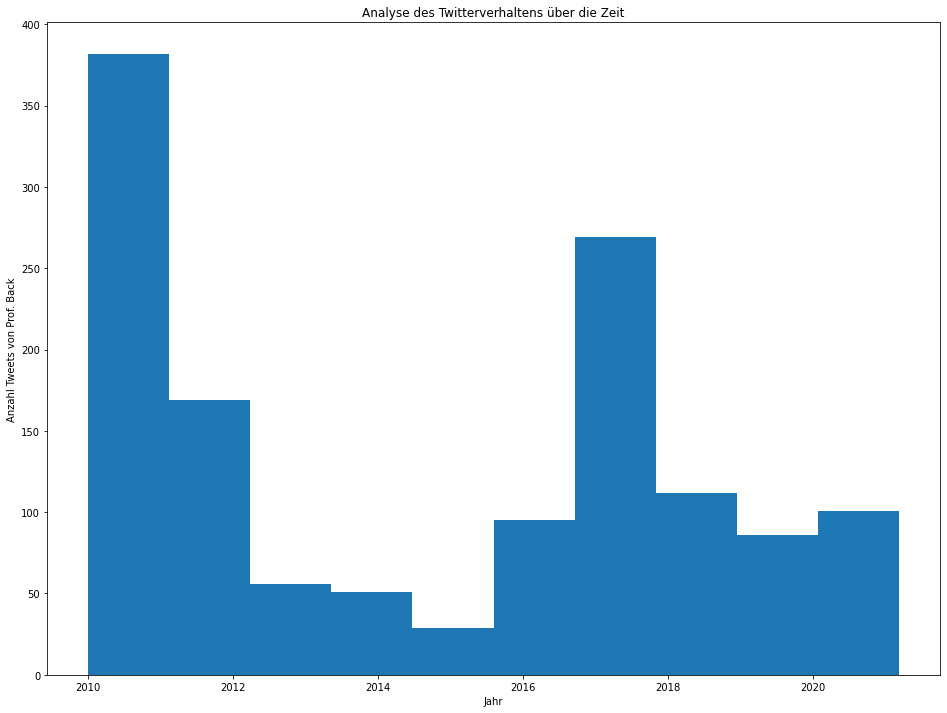

In [15]:
print('Erstes Datenset (Challenge 1)')
dates_list = df['date'].to_list()
# from https://stackoverflow.com/questions/44929555/how-to-properly-create-a-histogram-displaying-the-frequency-of-the-tweets-for-e

dates = []
for t in dates_list:
    # extract the date part of the datetime
    date_str = t.split(' ')[0]
    # extract the time from the date
    year,month,day = [int(i) for i in date_str.split('-')]
    # create a date object
    d = date(year, month, day)
    # sort
    dates.append(d)
    
# sort dates
dates.sort()

# find the first and last date
min_date = dates[0]
max_date = dates[-1]

# compute num days
length = (max_date - min_date).days + 1

# plot histogram
plt.figure(figsize=(16,12))
plt.hist(dates)

plt.title('Analyse des Twitterverhaltens über die Zeit')
plt.xlabel('Jahr')
plt.ylabel('Anzahl Tweets von Prof. Back')

plt.show()

In [14]:
df['date_only'] = pd.to_datetime(df['date'])
date_only = df['date_only'].dt.date
num_days = len(date_only.unique())
print("Anzahl Tage, an welchen Prof. Back twitterte:", num_days)

Anzahl Tage, an welchen Prof. Back twitterte: 790


##### 3.2 Als erstes Analysieren wir mal die Zeitachse zu unserem ersten Datenset.

Zweites Datenset (Challenge 2)
Anzahl Blogbeiträge auf der Webseite: 125


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/transforms.py:200: RuntimeWarning: coroutine 'Twint.main' was never awaited
  for parent in list(self._parents.values()):


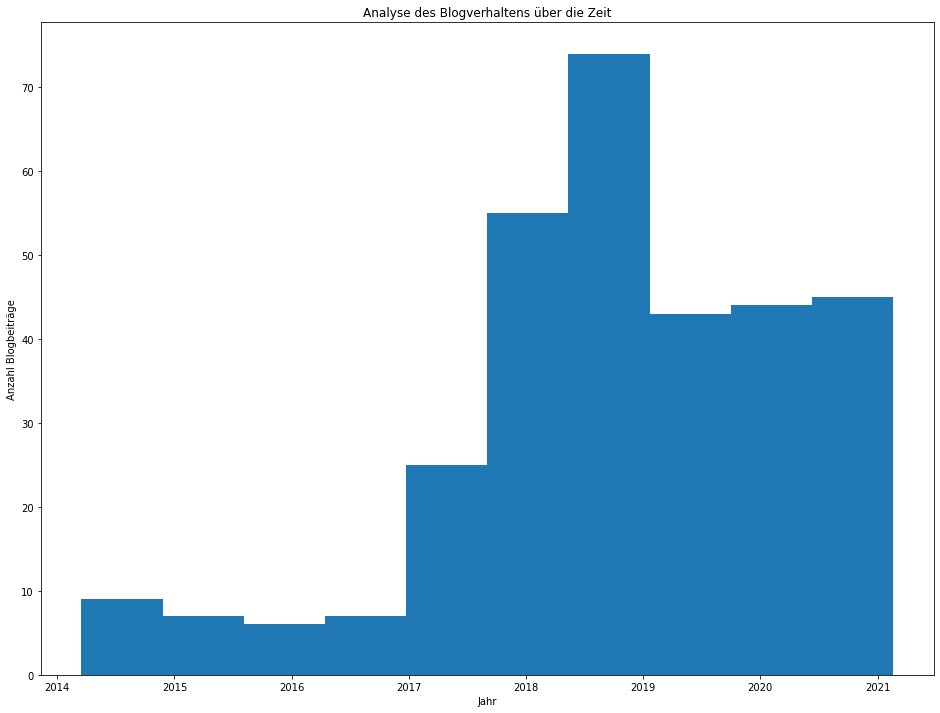

In [16]:
print('Zweites Datenset (Challenge 2)')

dates_list = df_2['date'].to_list()

# from https://stackoverflow.com/questions/44929555/how-to-properly-create-a-histogram-displaying-the-frequency-of-the-tweets-for-e

dates = []
for t in dates_list:
    # extract the date part of the datetime
    date_str = t.split(' ')[0]
    # extract the time from the date
    year,month,day = [int(i) for i in date_str.split('-')]
    # create a date object
    d = date(year, month, day)
    # sort
    dates.append(d)
    
# sort dates
dates.sort()

# find the first and last date
min_date = dates[0]
max_date = dates[-1]

# compute num days
length = (max_date - min_date).days + 1

# plot histogram
plt.close()
plt.figure(figsize=(16,12))
plt.hist(dates)

plt.title('Analyse des Blogverhaltens über die Zeit')
plt.xlabel('Jahr')
plt.ylabel('Anzahl Blogbeiträge')

plt.show()

df['date_only'] = pd.to_datetime(df_2['date'])
date_only = df['date_only'].dt.date
num_days = len(date_only.unique())
print("Anzahl Blogbeiträge auf der Webseite:", num_days)

4. Schritt: Analyse des Datensets mit Tableau

Gerne kannst du unser Tableau besuchen unter folgendem Link: https://public.tableau.com/profile/cyrill.m.ller#!/vizhome/TableauObjekt/TwitterBlogAnalyseA_Back?publish=yes

***Was haben wir herausgefunden:***

1. Nach 4 Jahren mit ca. einem Blog-Post pro Monat ist der Blog seit 2017 auf beachtliche 60-80 Blogbeiträge pro Jahr
angewachsen.
2. Gleichzeitig mit dem starken Anstieg an Blogposts lässt sich auch ein Anstieg an Verlinkungen auf die Post in 
Frau Back's Twitter Account feststellen. (ab 2017)
3. Allgemein lässt sich festhalten, dass Frau Back mit Vorliebe morgens und dann nochmal sehr spät abends twittert.
4. Die Themen Digital, Learning Innovations und Linktipps dominieren, es lässt sich allerdings nicht nachvollziehen, 
wie sehr einzelne Themengebiete überlappen.
5. Seit 2018 nimmt sich Frau Back immer mehr zurück als aktive Autoring auf dem Block, verlinkt aber in ihren 
Tweets trotzdem hauptsächlich auf ihre eigenen Block-Posts und kaum auf die ihrer Doktoranden:innen.
6. Die Themenbreite des Blogs bleibt in den ersten Jahren relativ stabil auf tiefem Niveau. Im Jahr 2017 steigt die Themenvielfalt an. Diese Entwicklung fällt mit der Ausweitung des Blogs zusammen. Wir nehmen an das Prof. Back sich mehr auf Ihren Blog fokussierte und mehr Content produzierte. 2019 steigt die Themenvielfalt erneut an: Diese Entwicklung lässt sich v.a. dadurch erklären, dass die Blogbeiträge nicht nur von Prof. Back geschrieben wurden. 
